## Masha V. Prokhorenko
### Deliverable 2

# Adjustments

## Scarrerplot Matrix after Data Adjustments
Note: see appendix for before and after.

After exploring data more and looking at the graphs I realized that my data was very skewed. I did not observe N/As or missing values, but after looking at the graphs it was evident that adjustments were needed. I studied the data and realized there were multiple outliers. For example, in the credit_sc colum, credit scores ranged from 301 to 850; however, if  credit score data was not available, the gap was filled with the number 9999. The data was therefore heavily skewed to the right. Other examples include, num_units - number of units with values 1, 2, 3, or 4 units, and 99 if not available; dtiratio - debt to income ratio with 0%<X<65%, and 999 if not available; insur_perc - insurance percentage reflects the interest rate with 0%<X<52%, and 999 if not available. I removed those rows completely to ensure the accuracy of the sampled data. 

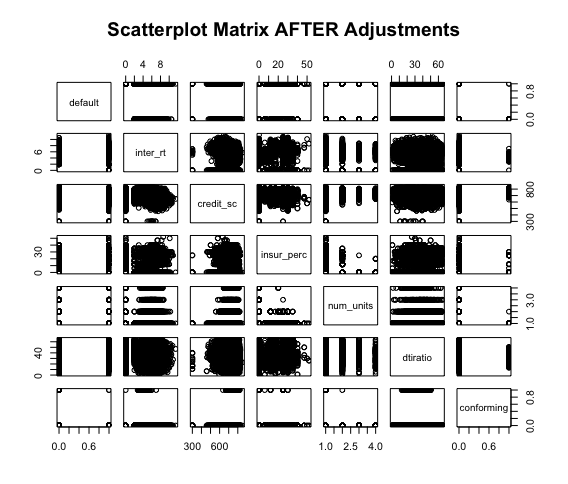

In [14]:
library("IRdisplay")
display_png(file="Rplot.png")  

## Correlation Plot after Data Adjustments
Note: see the appendix for before and after.

From this correlation plot we can better see that Default vs. Interest Rate and Default vs. Credit Score are negatively correlated. We also see that Default vs. Insurance percentage and Default vs. Debt to Income Ratio are positively correlated. 

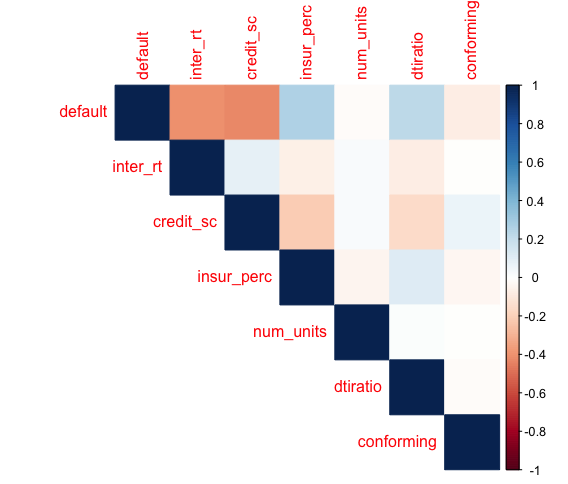

In [15]:
display_png(file="Rplot2.png")  

# Objective
To determine who will most likely default on loans and what interest rate should be charged for individual borrowers. 

# Background
Wall Street Journal speculates that risky mortgages, similar to those that caused the 2008 housing crisis, are making a comeback. Mortgage lenders then had improper incentives and originated risky loans that had a high incidence of default. My tool would decide if a mortgage is made based on objective factors that accurately predict low default potential by a borrower and what their interest rate should be. 

# Analysis
## I used the following techniques for determining interest rate:
### Linear Regression with Best Subset Selection
To adjust training error, I used the lowest value of Cp, which is an unbiased estimate of the test MSE, which selected the five-variable model as well as the lowest value of Bayesian Information criterion (BIC), which selected the five-variable model, too. We can see that Adjusted R squared flats out after 5.

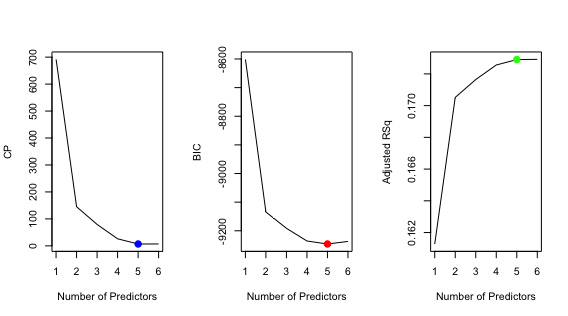

In [16]:
display_png(file="Rplot3.png")  

### Linear Regression with Validation Method
I used the Validation Set Approach to choose the best model. I ran a loop six times (because the data contains six variables) to determine the best number of variables for the model.

### Regression Tree
I fit a regression tree to the data. I created a training set and fit the tree to the training set. The model used only one of the variables to construct the tree. There was no need to use cross validation to reduce complexity as the model only had two branches.

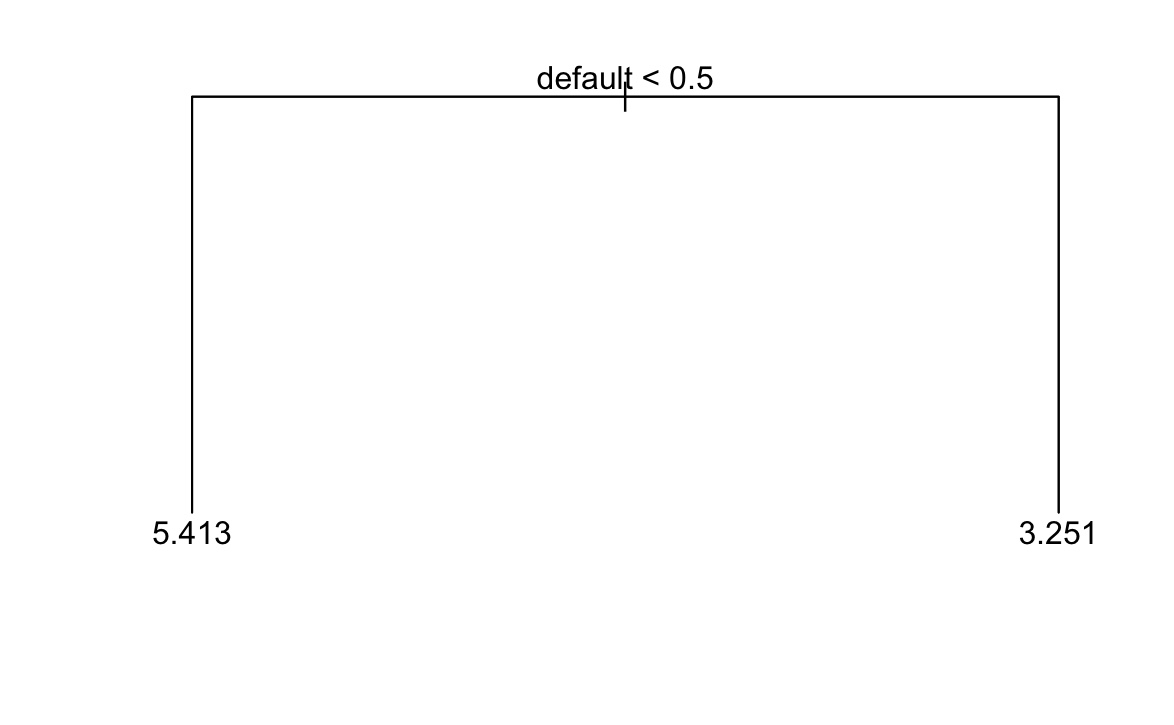

In [17]:
display_png(file="Rplot4.jpg")  

### Random Forest
I performed bagging first with six predictors. I also compared that model to the Random Forest of classification trees with two variables (i.e. squareroot of 6).

### I used the following techniques to predict default:
### Neural Network
I used the best subset selection to determine the best number of variables for the Neural Network model. To adjust training error, I used the lowest value of Cp, which is an unbiased estimate of the test MSE, which selected the five-variable model, as well as the lowest value of Bayesian Information criterion (BIC), which also selected the five-variable model. We can see that Adjusted R squared flats out after 5.

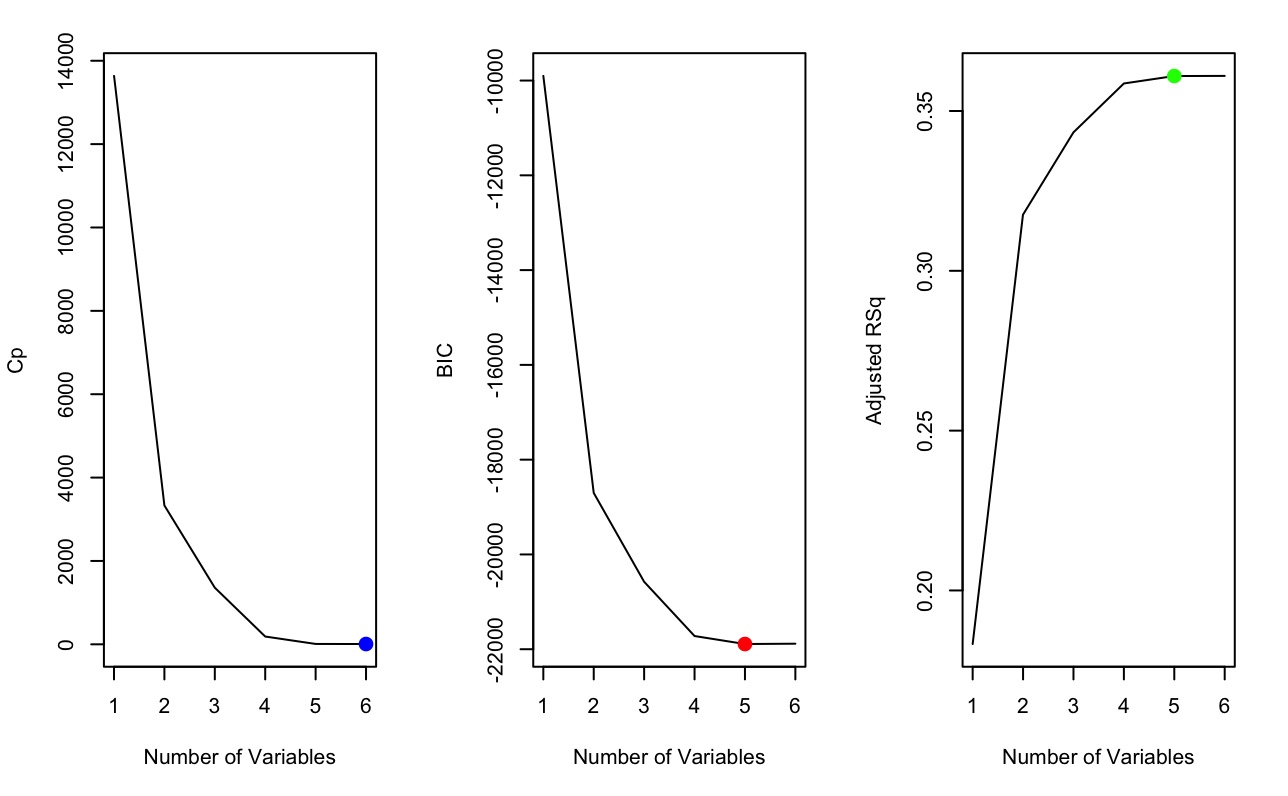

In [18]:
display_png(file="Rplot5.jpg")

Below is the visual of the two-variable model as the five-variable model would not converge. I chose two variables to be consistent with comparisons of results for the Support Vector Machines. I used two variables Interest Rate and Insurance Percentage, because the model would not converge with other combinations, with two hidden layers of size 2 and 1, respectively. 

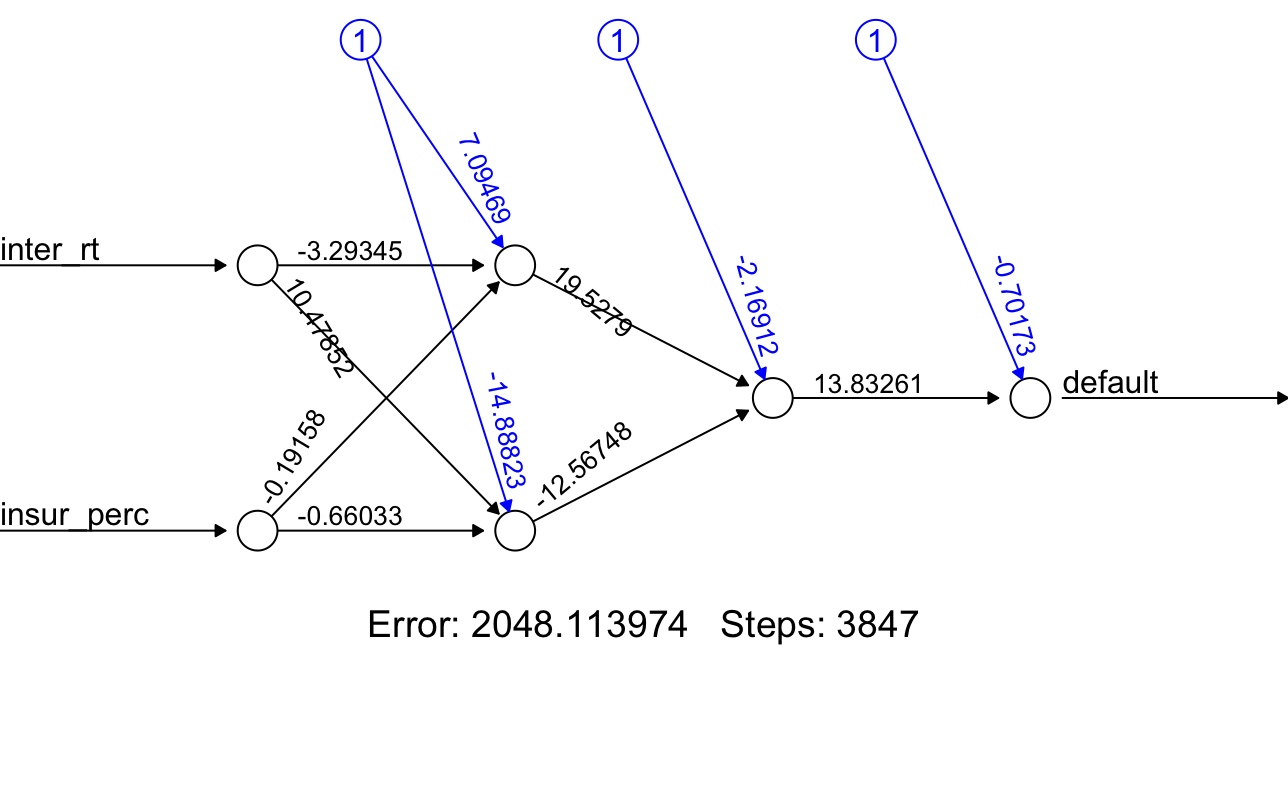

In [19]:
display_png(file="Rplot6.jpg")  

### Support Vector Machine Radial Kernel
I used Support Vector Machines with a radial kernel. I tested gamma equaling 0.5,2,and 4, and cost = 1.

Below is the plot of of two classes, default vs. not for two variables: credit score and interest rate; and the plot of the support vector classifier.

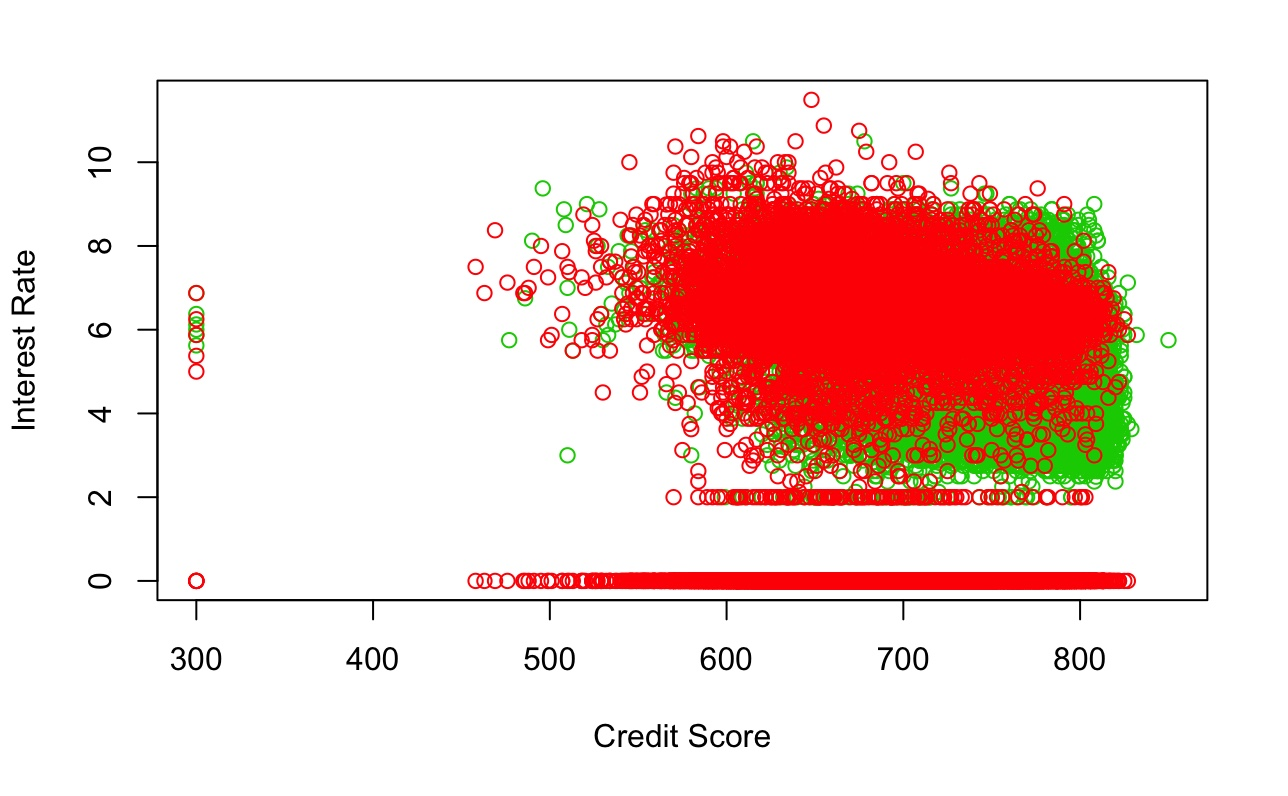

In [20]:
display_png(file="Rplot8.jpg")  

#### This plot shows gamma=0.5.

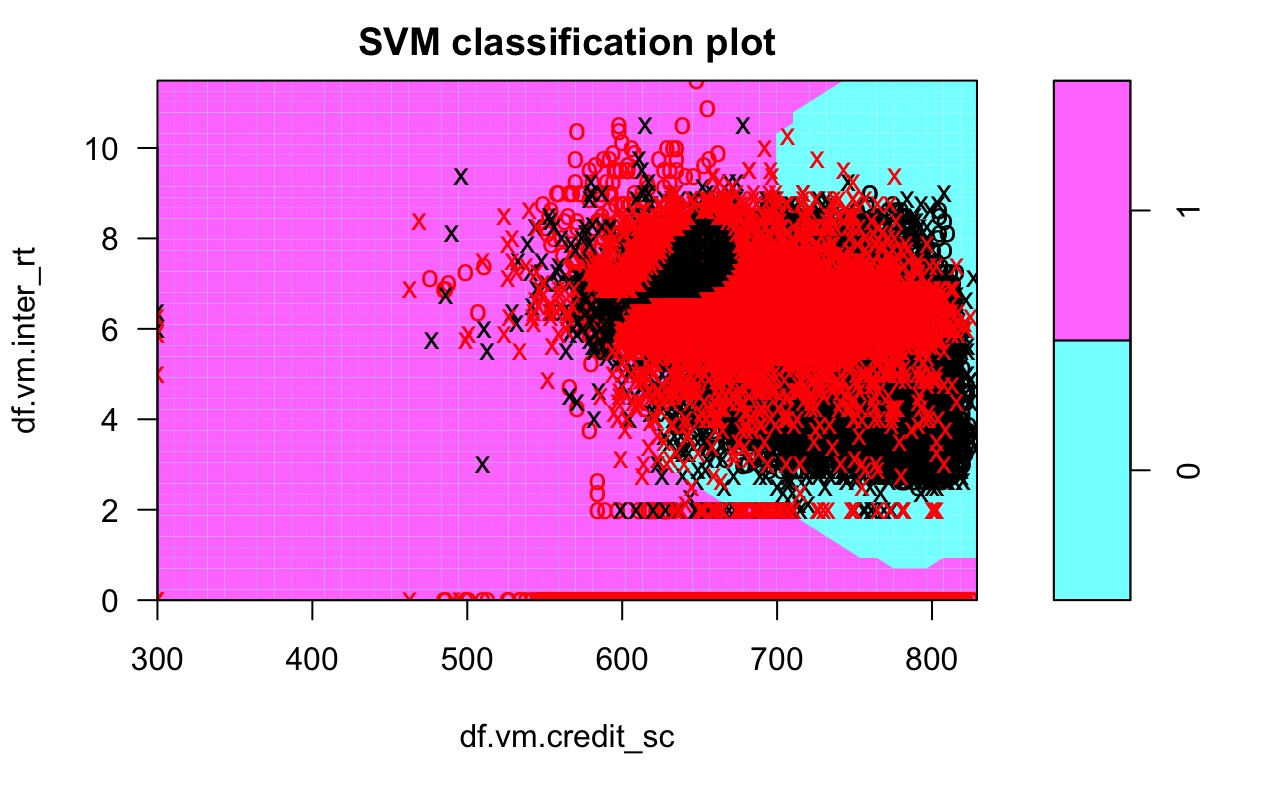

In [21]:
display_png(file="Rplot7.jpg")  

#### This plot shows gamma=1. Even though it predicted more correct values, it is more likely to overfit the data.

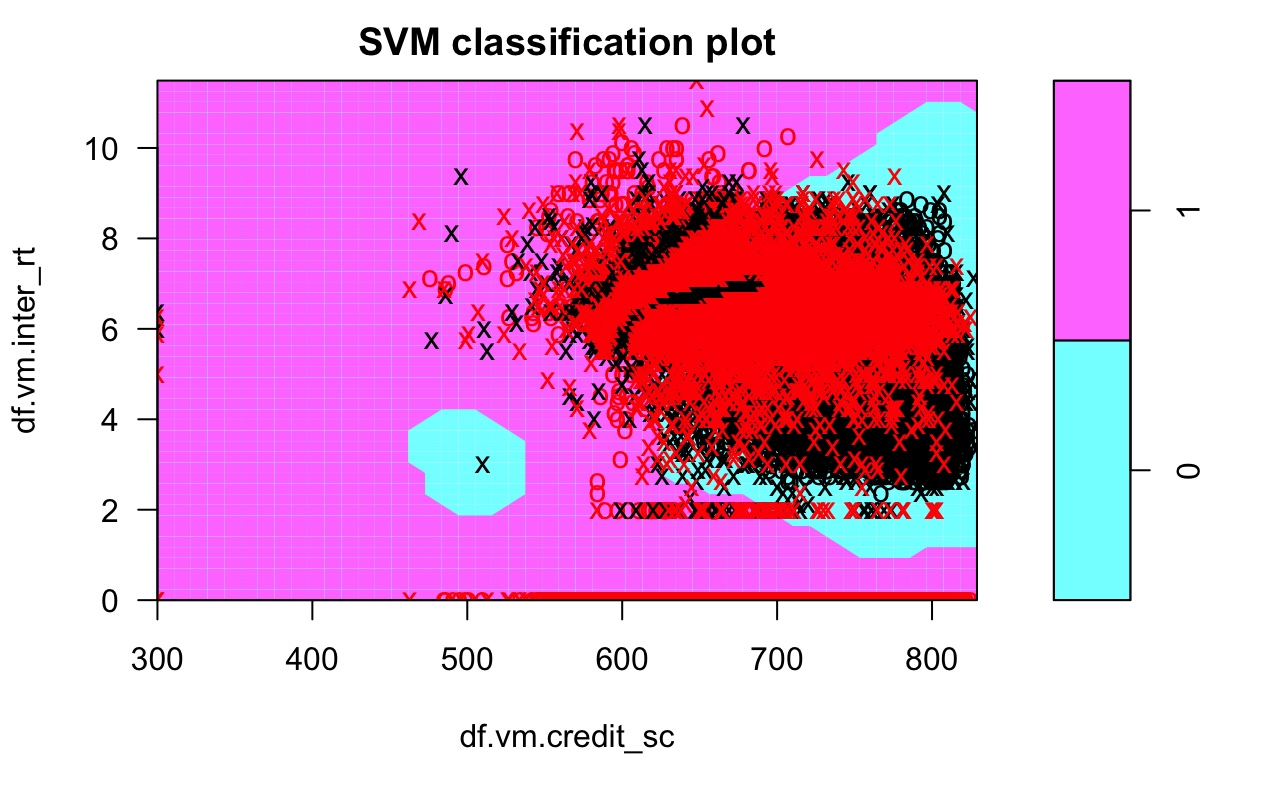

In [22]:
display_png(file="Rplot10.jpg")  

#### This plot shows gamma=4. It overfitted the data and gave lower accuracy compared to previous gammas.

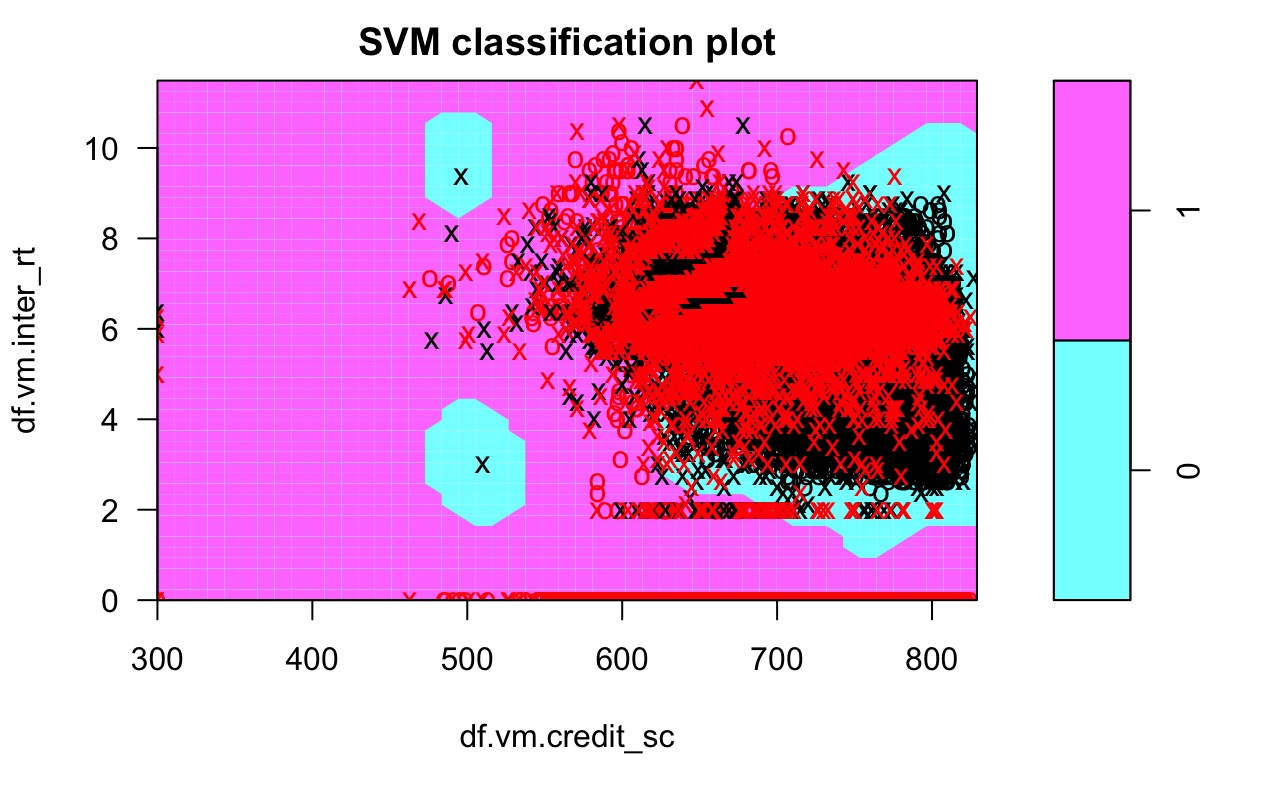

In [23]:
display_png(file="Rplot11.jpg")  

### Support Vector Machine Linear Kernel
I used Support Vector Machines with a linear kernel to see if results would improve.

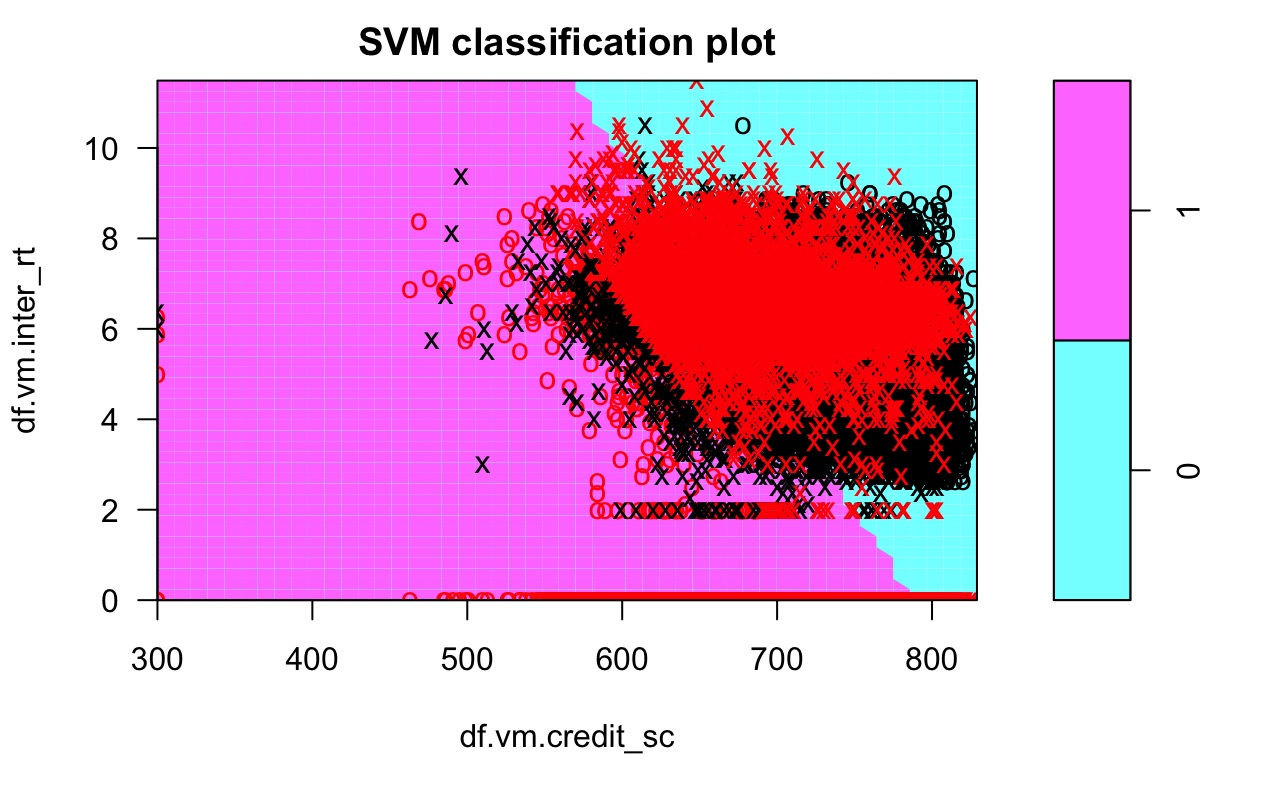

In [24]:
display_png(file="Rplot12.jpg")  

# Results
## Results for determining interest rate:
Below you will find the chart that summarizes performance of all models described above to determine interest rate.

| Model | MSE | Training MSE | Test MSE |
|:-----|:-----|:-----|:-----|
| Best Subset Selection | 6.169813 |   |   |
| Validation Method | 6.177905 |   |   |
| Regression Tree |   | 6.251 | 6.264 | 
| Bagging |   | 9.747 | 9.763 |
| Random Forest |   | 6.34 | 6.344 |


## Results for predicting default:
Below you will find the chart that summarizes performance of all models described above to determine default. For radial SVM, this number represents gamma = 0.5.

| Model | % Wrong | % Right |
|:-----|:-----|:-----|
| Neural Network | 23.50 | 76.50  |
| SVM Radial  | 19.86 | 80.14  |
| SVM Linear | 24.73  | 75.27 | 



# Conclusions
## Conclusions for determining interest rate:
I used a total of five methods to create five different model to estimate interest rate. The Best Subset Selection and Validation Method each produced similar results; however, Best Subset Selection uses fewer variables and has the lowest MSE. 

Therefore, the equation to predict the interest rate is

$\hat{y} = 8.533913944+ -2.493757087*default-0.004593636*credit_sc+0.007856611*insur_perc+0.234221106*num_units-1.093213175*conforming$


## Conclusions for predicting default:
I used a total of three different types of models and fitted with different parameters. The Support Vector Machine with gamma equaling 0.5 and cost parameter equaling 1 produced higher accuracy. The model was able to predict with 80.14% accuracy.

#  Follow on Work:

- Due to my computer's functional limits I used sample data. To verify my results it would be better to use the full dataset and use cloud computing to process the data.

- Create the full tool that uses the two models to estimate interest rate and predict default.

# Lessons Learned:
- Clearly defining problem statements before data cleaning.
- Examining graphs more thoroughly for outliers.
- Using more data and therefore use cloud computing to get better results for a neural network model.

# Appendix

In [26]:
x<-read.csv('df2.txt',sep="",header=T)

## Set up packages

In [1]:
options(stringsAsFactors = FALSE)
setwd('~/Desktop/Georgetown/542 Machine Learning/project')
remove.packages(c("dplyr", "data.table"))
install.packages('Rcpp', dependencies = TRUE)
#install.packages('dplyr', dependencies = TRUE)
install.packages('data.table', dependencies = TRUE)
#install.packages("dplyr")
install.packages("dplyr", repos = "http://cran.us.r-project.org")

Removing packages from ‘/Users/Fletcher/Library/R/3.4/library’
(as ‘lib’ is unspecified)
Installing package into ‘/Users/Fletcher/Library/R/3.4/library’
(as ‘lib’ is unspecified)
Installing package into ‘/Users/Fletcher/Library/R/3.4/library’
(as ‘lib’ is unspecified)
Installing package into ‘/Users/Fletcher/Library/R/3.4/library’
(as ‘lib’ is unspecified)


In [2]:
#install.packages('dplyr', dependencies = TRUE)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
options(stringsAsFactors = FALSE)
setwd('~/Desktop/Georgetown/542 Machine Learning/project')
#install.packages("dplyr")
#install.packages("dplyr", repos = "http://cran.us.r-project.org")
#library(dplyr)
#install.packages("readr")
#install.packages("readr", repos = "http://cran.us.r-project.org")
library(readr)
#install.packages("data.table")
#install.packages("data.table", repos = "http://cran.us.r-project.org")
library(data.table)
#install.packages("stringr")
#install.packages("stringr", repos = "http://cran.us.r-project.org")
library(stringr)
#install.packages("corrplot")
#install.packages("corrplot", repos = "http://cran.us.r-project.org")
library(corrplot)
install.packages("e1071")
#install.packages("e1071", repos = "http://cran.us.r-project.org")
library(e1071)
install.packages("neuralnet")
#install.packages("neuralnet", repos = "http://cran.us.r-project.org")
library(neuralnet)
install.packages("leaps")
#install.packages("leaps", repos = "http://cran.us.r-project.org")
library(leaps)
install.packages("tree")
#install.packages("tree", repos = "http://cran.us.r-project.org")
library(tree)
install.packages("randomForest")
#install.packages("randomForest", repos = "http://cran.us.r-project.org")
library(randomForest)


Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

corrplot 0.84 loaded
Installing package into ‘/Users/Fletcher/Library/R/3.4/library’
(as ‘lib’ is unspecified)
Installing package into ‘/Users/Fletcher/Library/R/3.4/library’
(as ‘lib’ is unspecified)

Attaching package: ‘neuralnet’

The following object is masked from ‘package:dplyr’:

    compute

Installing package into ‘/Users/Fletcher/Library/R/3.4/library’
(as ‘lib’ is unspecified)
Installing package into ‘/Users/Fletcher/Library/R/3.4/library’
(as ‘lib’ is unspecified)
Warning message:
“package ‘tree’ is not available (for R version 3.4.3)”Installing package into ‘/Users/Fletcher/Library/R/3.4/library’
(as ‘lib’ is unspecified)
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine



## Explore Data

In [27]:
head(x)
summary(x)

loan_num     default inter_rt credit_sc first_home_buy insur_perc num_units
1 F105Q3395982 0       5.750    731       9               0         1        
2 F110Q3227787 0       5.250    820       9               0         1        
3 F102Q4060832 0       6.250    653       9               0         1        
4 F107Q2202997 0       7.375    755       N              25         1        
5 F109Q2411165 0       4.375    724       N               0         1        
6 F102Q2190034 0       6.750    721       N               0         1        
  ocup_status dtiratio conforming state first_pay 
1 P           26       0          AZ    2005-11-01
2 I           20       0          IL    2010-09-01
3 P           22       0          GA    2002-12-01
4 I           34       0          SC    2007-07-01
5 P           42       0          WA    2009-08-01
6 P           22       0          MI    2002-07-01

   loan_num            default       inter_rt        credit_sc   
 Length:50282       Min.   :0.0   Min.   : 0.000   Min.   : 300  
 Class :character   1st Qu.:0.0   1st Qu.: 2.000   1st Qu.: 665  
 Mode  :character   Median :0.5   Median : 5.375   Median : 712  
                    Mean   :0.5   Mean   : 4.337   Mean   : 732  
                    3rd Qu.:1.0   3rd Qu.: 6.375   3rd Qu.: 761  
                    Max.   :1.0   Max.   :11.500   Max.   :9999  
 first_home_buy       insur_perc       num_units      ocup_status       
 Length:50282       Min.   :  0.00   Min.   : 1.000   Length:50282      
 Class :character   1st Qu.:  0.00   1st Qu.: 1.000   Class :character  
 Mode  :character   Median :  0.00   Median : 1.000   Mode  :character  
                    Mean   : 14.27   Mean   : 1.033                     
                    3rd Qu.: 25.00   3rd Qu.: 1.000                     
                    Max.   :999.00   Max.   :99.000                     
    dtiratio        conform

## Adjustments - remove outliers

In [28]:
x %>%
  filter(!num_units=="99") %>%
  filter(!credit_sc=="9999") %>%
  filter(!insur_perc=="999") %>%
  filter(!dtiratio=="999") ->y

## Explore data after adjustments

In [29]:
summary(y)

   loan_num            default          inter_rt        credit_sc    
 Length:49022       Min.   :0.0000   Min.   : 0.000   Min.   :300.0  
 Class :character   1st Qu.:0.0000   1st Qu.: 2.000   1st Qu.:665.0  
 Mode  :character   Median :0.0000   Median : 5.375   Median :712.0  
                    Mean   :0.4985   Mean   : 4.324   Mean   :710.6  
                    3rd Qu.:1.0000   3rd Qu.: 6.375   3rd Qu.:761.0  
                    Max.   :1.0000   Max.   :11.490   Max.   :850.0  
 first_home_buy       insur_perc       num_units    ocup_status       
 Length:49022       Min.   : 0.000   Min.   :1.00   Length:49022      
 Class :character   1st Qu.: 0.000   1st Qu.:1.00   Class :character  
 Mode  :character   Median : 0.000   Median :1.00   Mode  :character  
                    Mean   : 7.995   Mean   :1.03                     
                    3rd Qu.:25.000   3rd Qu.:1.00                     
                    Max.   :52.000   Max.   :4.00                     
    dtiratio 

## Adjustments - create correlation plots with numerical columns

This looks much better compared to the one I submitted before and you can see patterns now.

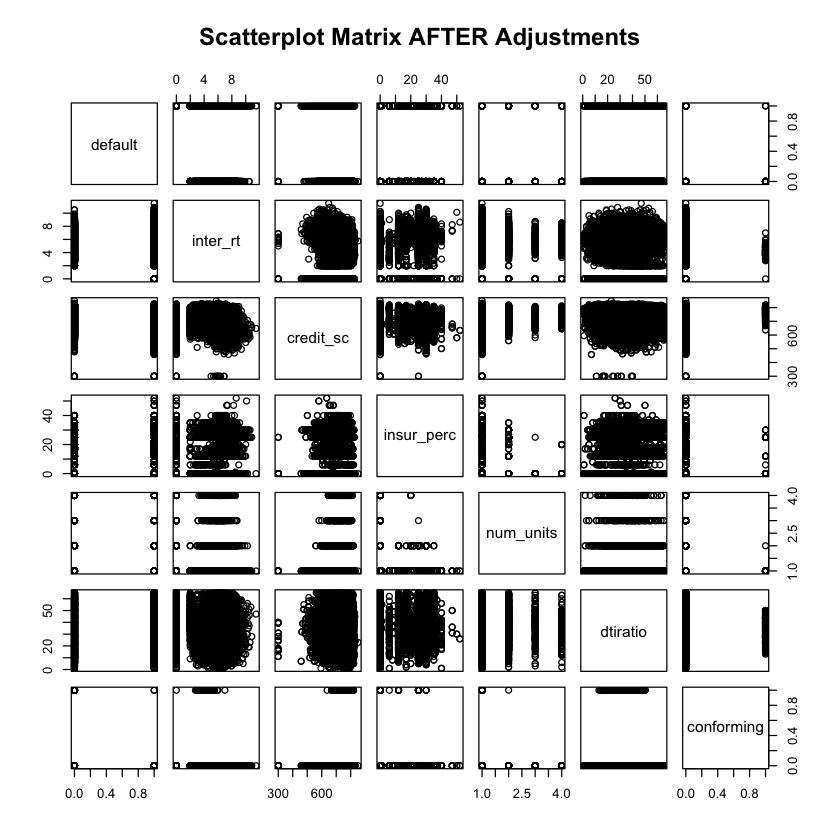

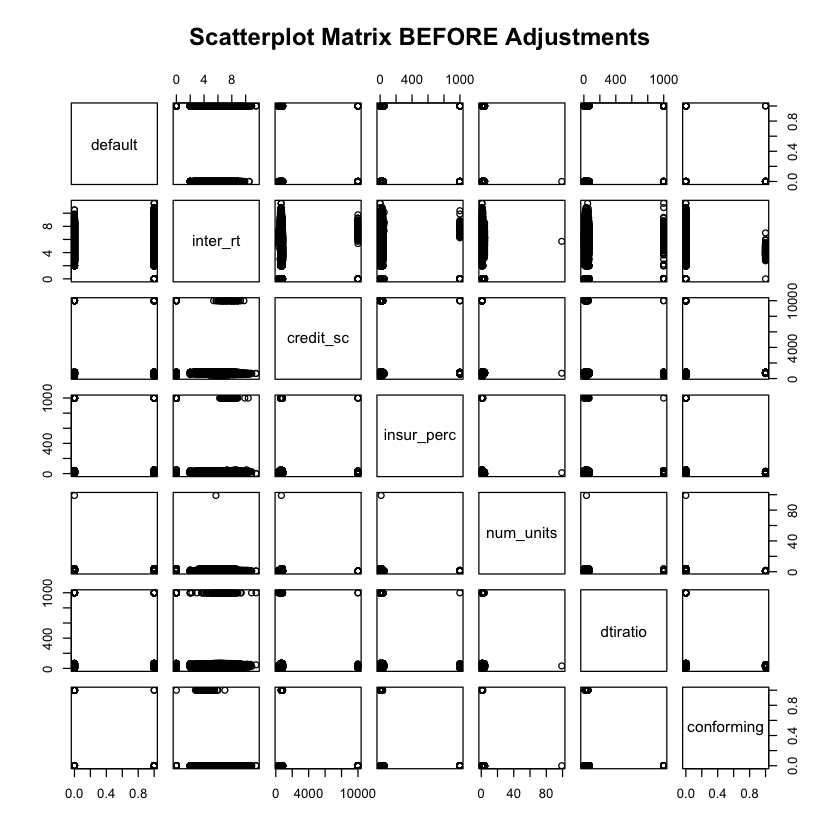

In [30]:
y %>%
  dplyr::select(default, inter_rt, credit_sc, insur_perc, num_units, dtiratio, conforming) -> df
pairs(df, main = "Scatterplot Matrix AFTER Adjustments")

x %>%
  dplyr::select(default, inter_rt, credit_sc, insur_perc, num_units, dtiratio, conforming) -> df1
pairs(df1, main = "Scatterplot Matrix BEFORE Adjustments")

## Adjustments - new correlation matrix and plot

You can see before and after correlation plot.
From this correlation plot we can better see that Default vs. Interest Rate and Default vs. Credit Score are negatively correlated. We also see that Default vs. Insurance percentage and Default vs. Debt to Income Ratio are positively correlated. 

default inter_rt credit_sc insur_perc num_units dtiratio conforming
default     1.00   -0.40    -0.43      0.27      -0.01      0.22    -0.08     
inter_rt   -0.40    1.00     0.08     -0.06       0.02     -0.08     0.00     
credit_sc  -0.43    0.08     1.00     -0.22       0.02     -0.15     0.06     
insur_perc  0.27   -0.06    -0.22      1.00      -0.04      0.11    -0.04     
num_units  -0.01    0.02     0.02     -0.04       1.00      0.01    -0.01     
dtiratio    0.22   -0.08    -0.15      0.11       0.01      1.00    -0.01

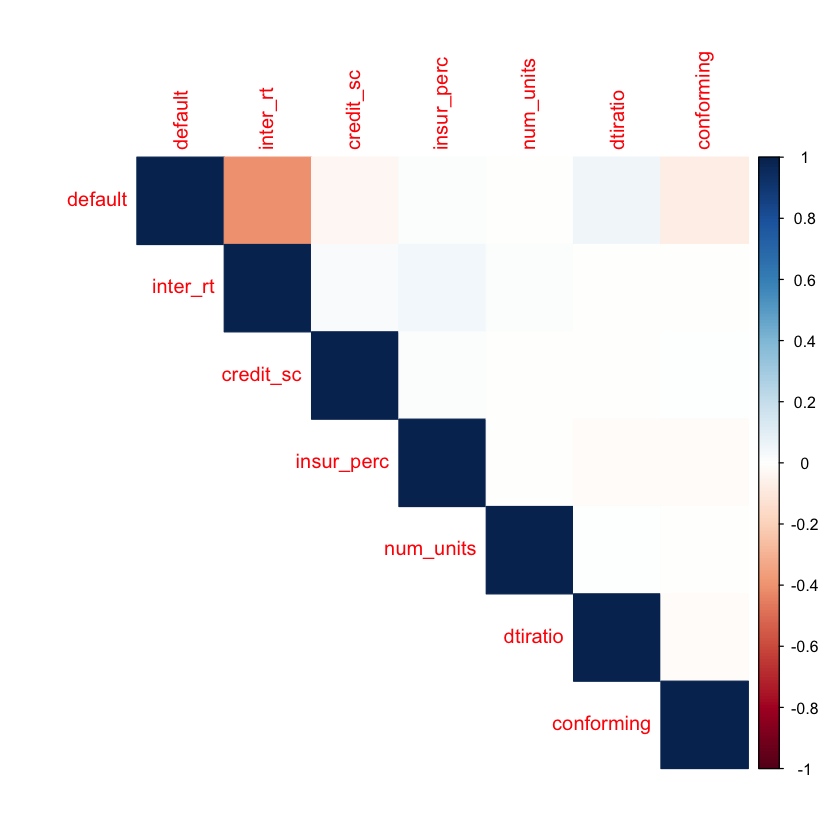

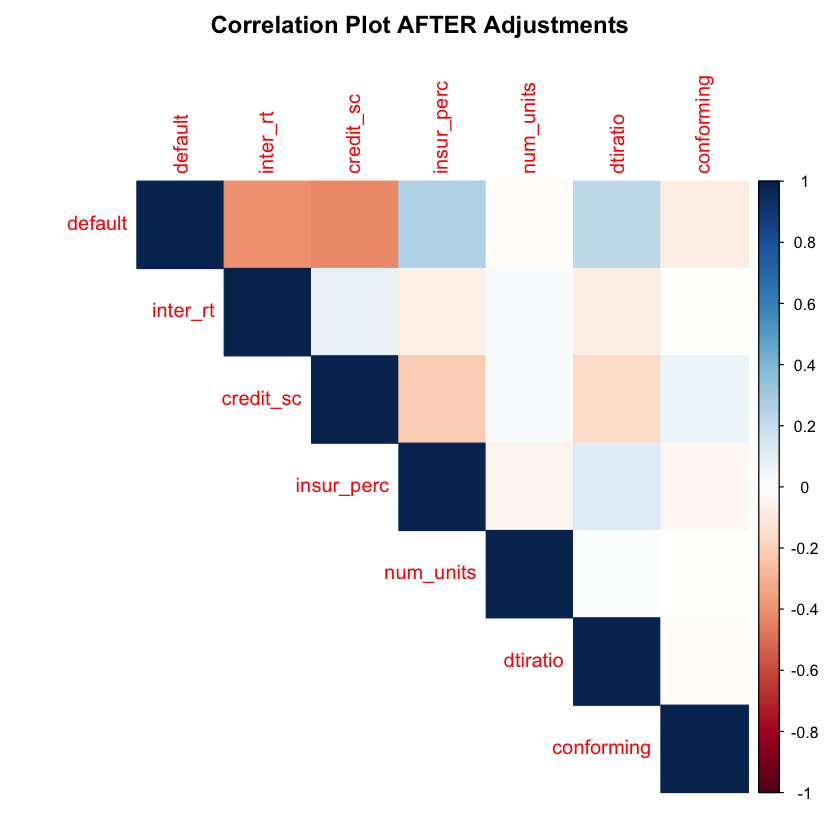

In [31]:
res<-cor(df)
head(round(res,2))
display_png(file="output_14_1.png")  
corrplot(res, type = "upper", method = "color",main = "Correlation Plot AFTER Adjustments",mar=c(0,0,2,0))

# Analysis

## Linear Regression
### Best Subset Selection to predict interest rate

Subset selection object
Call: regsubsets.formula(inter_rt ~ ., df)
6 Variables  (and intercept)
           Forced in Forced out
default        FALSE      FALSE
credit_sc      FALSE      FALSE
insur_perc     FALSE      FALSE
num_units      FALSE      FALSE
dtiratio       FALSE      FALSE
conforming     FALSE      FALSE
1 subsets of each size up to 6
Selection Algorithm: exhaustive
         default credit_sc insur_perc num_units dtiratio conforming
1  ( 1 ) "*"     " "       " "        " "       " "      " "       
2  ( 1 ) "*"     "*"       " "        " "       " "      " "       
3  ( 1 ) "*"     "*"       "*"        " "       " "      " "       
4  ( 1 ) "*"     "*"       "*"        " "       " "      "*"       
5  ( 1 ) "*"     "*"       "*"        "*"       " "      "*"       
6  ( 1 ) "*"     "*"       "*"        "*"       "*"      "*"       

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 0.1612960 0.1705521 0.1716950 0.1726278 0.1729862 0.1730184

[1] 306731.9 303346.7 302928.7 302587.6 302456.6 302444.8

[1] 6

[1] 6

[1] 5

[1] 5

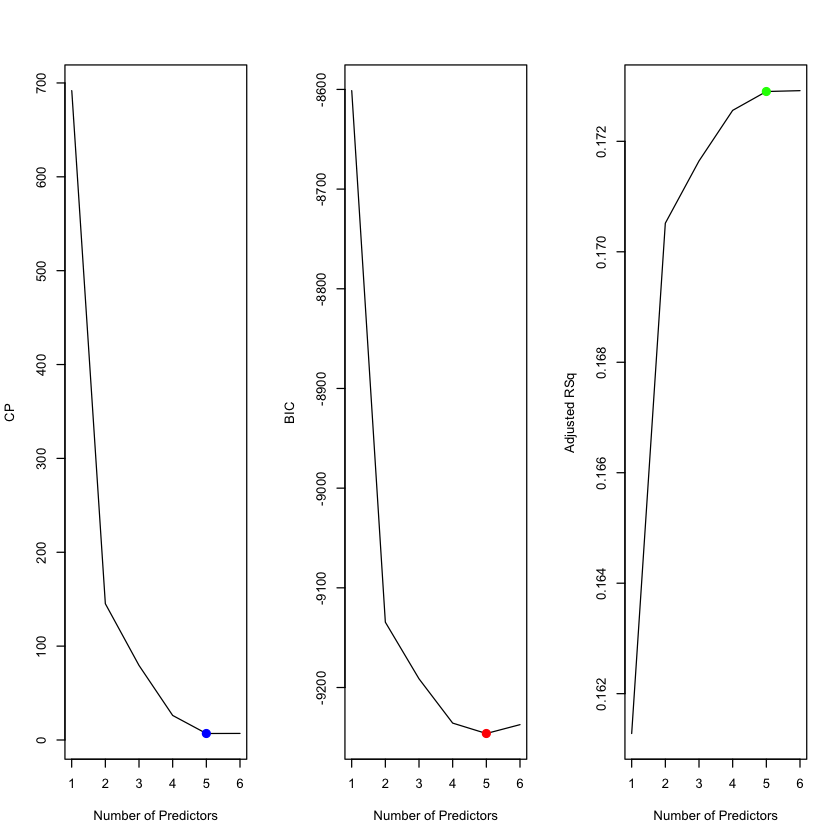

In [32]:
regfit.full=regsubsets(inter_rt ~ ., df)
summary(regfit.full)
regsummary=summary(regfit.full)
names(regsummary)
regsummary$rsq
regsummary$rss

which.max(regsummary$rsq)
which.min(regsummary$rss)
which.min(regsummary$cp)
which.min(regsummary$bic)

par(mfrow=c(1,3))
plot(regsummary$cp,xlab="Number of Predictors",ylab="CP",type="l")
points(5,regsummary$cp[5],col="blue",cex=2,pch=20)
plot(regsummary$bic,xlab="Number of Predictors",ylab="BIC",type="l")
points(5,regsummary$bic[5],col="red",cex=2,pch=20)
plot(regsummary$adjr2,xlab="Number of Predictors",ylab="Adjusted RSq",type="l")
points(5,regsummary$adjr2[5],col="green",cex=2,pch=20)

### Fit Linear model using Best Subset Selection with 5 variables
The model with the lowest BIC is the five-variable model that contains all variables except dtiratio. We can see the coefficients associated with this model.

In [33]:
which.min(regsummary$bic)
coef(regfit.full,5)
MSE.lin.regr=(1/nrow(df))*regsummary$rss[5] #to Calculate MSE
MSE.lin.regr

[1] 5

(Intercept)      default    credit_sc   insur_perc    num_units   conforming 
 8.533913944 -2.493757087 -0.004593636  0.007856611  0.234221106 -1.093213175

[1] 6.169813

MSE for Linear model using Best Subset Selection: 6.169813

### Validation Method to estimate interest rate

In [34]:
set.seed(1)
train=sample(c(TRUE, FALSE), nrow(df), rep=TRUE)
test=(!train)
regfit.best=regsubsets(inter_rt ~ ., data=df[train,], nvmax=6)
test.mat=model.matrix(inter_rt ~ ., data=df[test,])
val.errors=rep(NA,6)
for (i in 1:6){
  coefi=coef(regfit.best,id=i)
  pred=test.mat[,names(coefi)]%*%coefi
  val.errors[i]=mean((df$inter_rt[test]-pred)^2)
}

### Fit Linear model using Validation Method with 6 variables

In [35]:
val.errors
which.min(val.errors)
MSE.Val.Meth=val.errors[which.min(val.errors)]
MSE.Val.Meth
coef(regfit.best,6)

[1] 6.257874 6.197298 6.187847 6.180931 6.178145 6.177905

[1] 6

[1] 6.177905

(Intercept)      default    credit_sc   insur_perc    num_units     dtiratio 
 8.671109419 -2.489130518 -0.004829637  0.007340116  0.227001152  0.001349789 
  conforming 
-1.079422497

MSE for Linear model using Validation Method: 6.177905

### Fit Regression Tree to estimate interest rate


Regression tree:
tree(formula = inter_rt ~ ., data = df, subset = train)
Variables actually used in tree construction:
[1] "default"
Number of terminal nodes:  2 
Residual mean deviance:  6.264 = 153500 / 24510 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.41300 -2.66300  0.08715  0.00000  2.24900  8.23900 

[1] 6.251574

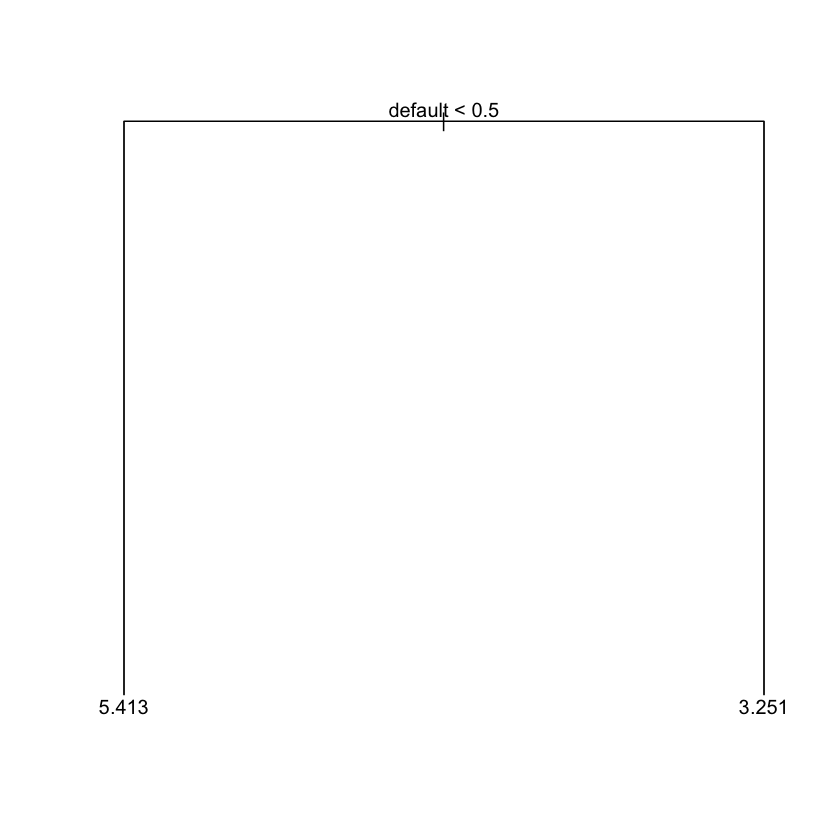

In [36]:
set.seed(1)
train=sample(1:nrow(df),nrow(df)/2)
tree.df=tree(inter_rt~.,df,subset=train)
summary(tree.df)
plot(tree.df)
text(tree.df,pretty=0)

yhat=predict(tree.df,newdata = df[-train,])
df.test=df[-train, "inter_rt"]
MSE_Regr_Tree=mean((yhat-df.test)^2)
MSE_Regr_Tree

MSE for Regression Tree: 6.264 - training data
<br>
MSE for Regression Tree: 6.251574 - test data

### Use Bagging to estimate interest rate

In [37]:
bag.df=randomForest(inter_rt~.,data=df,subset=train,mtry=6)
bag.df
yhat.bag=predict(bag.df,newdata=df[-train,])
MSE.Rand.Forest=mean((yhat.bag-df.test)^2)
MSE.Rand.Forest


Call:
 randomForest(formula = inter_rt ~ ., data = df, mtry = 6, subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 9.632734
                    % Var explained: -29.62

[1] 9.747316

MSE for Bagging:9.632734 - training data
<br>
MSE for Bagging: 9.747316 - test data

### Use Random Forest to estimate interest rate

In [38]:
rf.df=randomForest(inter_rt~.,data=df,subset=train,mtry=2, importance=TRUE)
rf.df
yhat.rf=predict(rf.df,newdata=df[-train,])
MSE.Rand.Forest2=mean((yhat.rf-df.test)^2)
MSE.Rand.Forest2


Call:
 randomForest(formula = inter_rt ~ ., data = df, mtry = 2, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 6.338928
                    % Var explained: 14.7

[1] 6.344258

MSE for Random Forest: 6.338928 - training data
<br>
MSE for Random Forest: 6.344258 - test data

### The Best Subset Selection for default

Subset selection object
Call: regsubsets.formula(default ~ ., df)
6 Variables  (and intercept)
           Forced in Forced out
inter_rt       FALSE      FALSE
credit_sc      FALSE      FALSE
insur_perc     FALSE      FALSE
num_units      FALSE      FALSE
dtiratio       FALSE      FALSE
conforming     FALSE      FALSE
1 subsets of each size up to 6
Selection Algorithm: exhaustive
         inter_rt credit_sc insur_perc num_units dtiratio conforming
1  ( 1 ) " "      "*"       " "        " "       " "      " "       
2  ( 1 ) "*"      "*"       " "        " "       " "      " "       
3  ( 1 ) "*"      "*"       "*"        " "       " "      " "       
4  ( 1 ) "*"      "*"       "*"        " "       "*"      " "       
5  ( 1 ) "*"      "*"       "*"        " "       "*"      "*"       
6  ( 1 ) "*"      "*"       "*"        "*"       "*"      "*"       

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 0.1832568 0.3176265 0.3433638 0.3586624 0.3610065 0.3610581

[1] 10009.510  8362.757  8047.336  7859.845  7831.118  7830.485

[1] 1

[1] 6

[1] 6

[1] 5

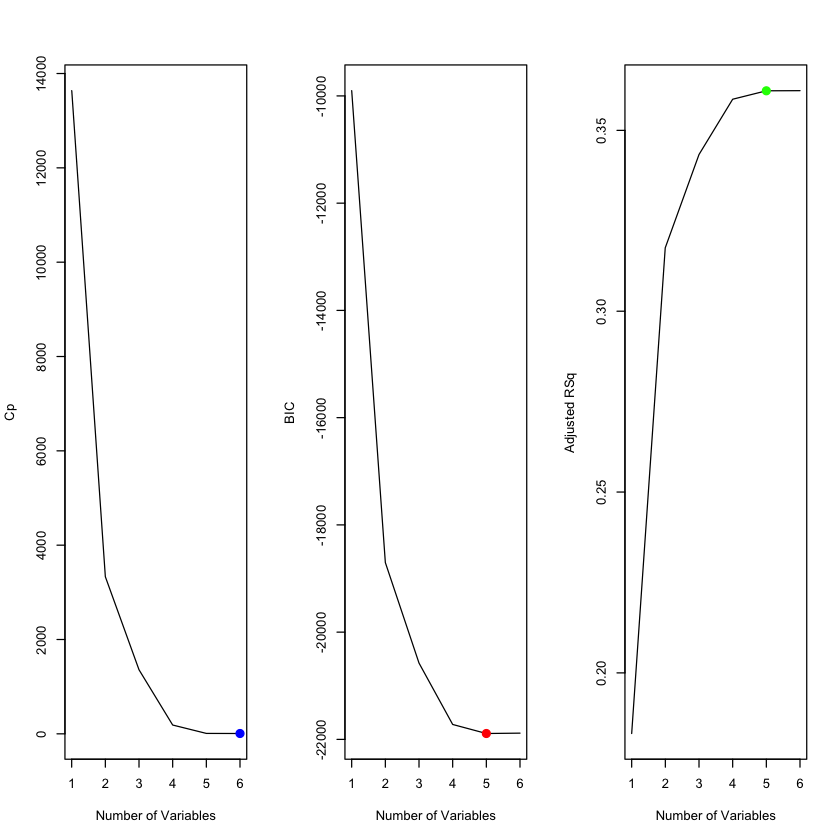

In [39]:
regfit.full2=regsubsets(default ~ ., df)
summary(regfit.full2)
regsummary2=summary(regfit.full2)
names(regsummary2)
regsummary2$rsq
regsummary2$rss


which.min(regsummary2$rsq)
which.min(regsummary2$rss)
which.min(regsummary2$cp)
which.min(regsummary2$bic)

par(mfrow=c(1,3))
plot(regsummary2$cp,xlab="Number of Variables",ylab="Cp",type="l")
points(6,regsummary2$cp[6],col="blue",cex=2,pch=20)
plot(regsummary2$bic,xlab="Number of Variables",ylab="BIC",type="l")
points(5,regsummary2$bic[5],col="red",cex=2,pch=20)
plot(regsummary2$adjr2,xlab="Number of Variables",ylab="Adjusted RSq",type="l")
points(5,regsummary2$adjr2[5],col="green",cex=2,pch=20)

### Neural Network

In [40]:
df %>%
  dplyr::select(default, inter_rt, insur_perc) -> df.nn
trainset <- df.nn[train, ]
testset <- df.nn[-train, ]
nn <- neuralnet( default ~ inter_rt+insur_perc, data=trainset, hidden=c(2,1), linear.output=FALSE, threshold=0.01)
nn$result.matrix
plot(nn)

[,1]         
error                   1.907475e+03
reached.threshold       9.964427e-03
steps                   3.671100e+04
Intercept.to.1layhid1  -1.863127e+01
inter_rt.to.1layhid1    8.901374e+00
insur_perc.to.1layhid1  1.029431e-01
Intercept.to.1layhid2  -6.901392e+00
inter_rt.to.1layhid2    2.605809e+00
insur_perc.to.1layhid2 -7.250898e+02
Intercept.to.2layhid1  -3.287421e+00
1layhid1.to.2layhid1    4.952360e+00
1layhid2.to.2layhid1    2.099400e+01
Intercept.to.default    6.531344e+00
2layhid1.to.default    -7.599099e+00

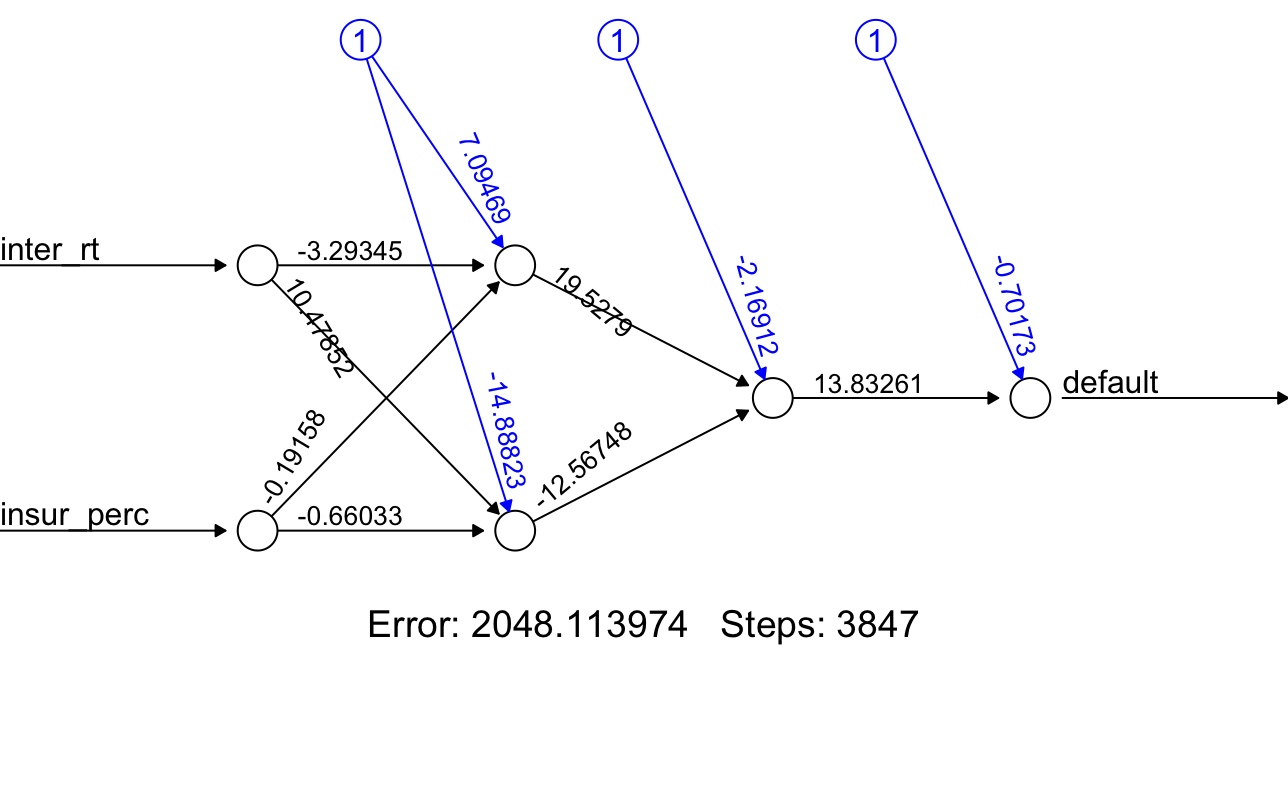

In [43]:
display_png(file="Rplot6.jpg")  

### Test the Neural Network Model

In [44]:
temp_test <- subset(testset, select = c("inter_rt", "insur_perc"))
#head(temp_test)
nn.results <- compute(nn, temp_test)
#head(nn.results)
results <- data.frame(actual = testset$default, prediction = nn.results$net.result)
#head(results)
roundedresults<-sapply(results,round,digits=0)
roundedresultsdf=data.frame(roundedresults)
attach(roundedresultsdf)
table(actual,prediction)

      prediction
actual    0    1
     0 9923 2340
     1 3421 8827

### Results

In [45]:
(2340+3421)/(9923+8827+3421+2340)
1-(2340+3421)/(9923+8827+3421+2340)

[1] 0.2350373

[1] 0.7649627

The model yileds 76.5% accuracy with two features interest rate and insurance percentage.

## Support Vector Machines for Credit Card Default

default inter_rt credit_sc insur_perc num_units dtiratio conforming
1 0       5.750    731        0         1         26       0         
2 0       5.250    820        0         1         20       0         
3 0       6.250    653        0         1         22       0         
4 0       7.375    755       25         1         34       0         
5 0       4.375    724        0         1         42       0         
6 0       6.750    721        0         1         22       0

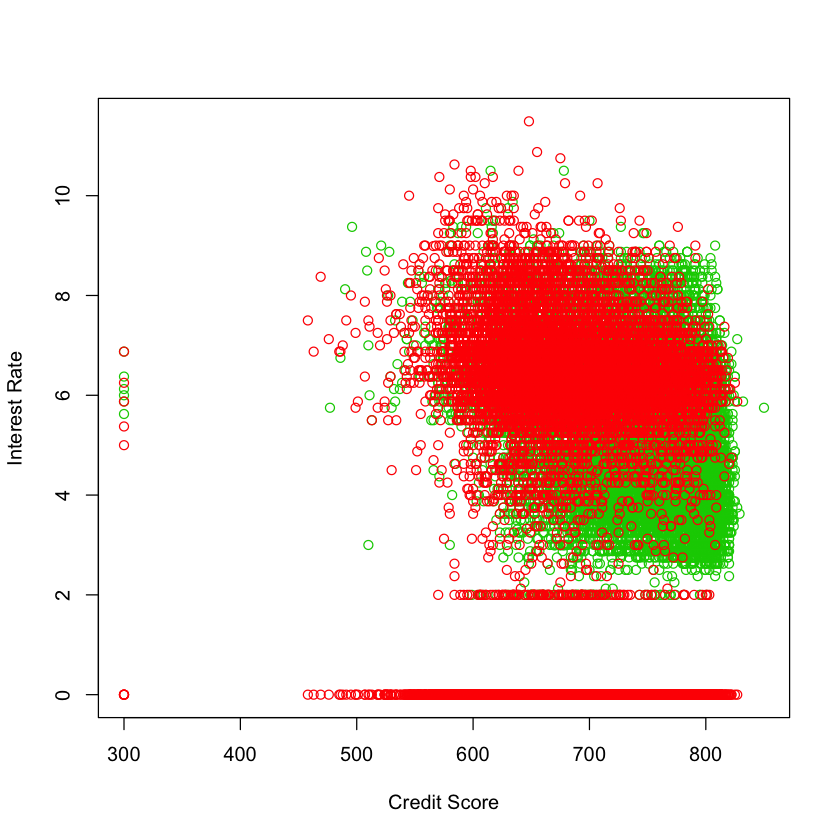

In [46]:
head(df)
df %>%
  dplyr::select(default) -> w
w=as.numeric(as.character(w$default))
plot(df[,3],df[,2],col=(3-w),xlab="Credit Score",ylab="Interest Rate")

### Create a dataframe for SVM

In [47]:
dat=data.frame(df.vm=df[,2:3],w=as.factor(w))
head(dat)
dim(dat)

df.vm.inter_rt df.vm.credit_sc w
1 5.750          731             0
2 5.250          820             0
3 6.250          653             0
4 7.375          755             0
5 4.375          724             0
6 6.750          721             0

[1] 49022     3

### Fit the traing data using Radial Support Vector Machine Model

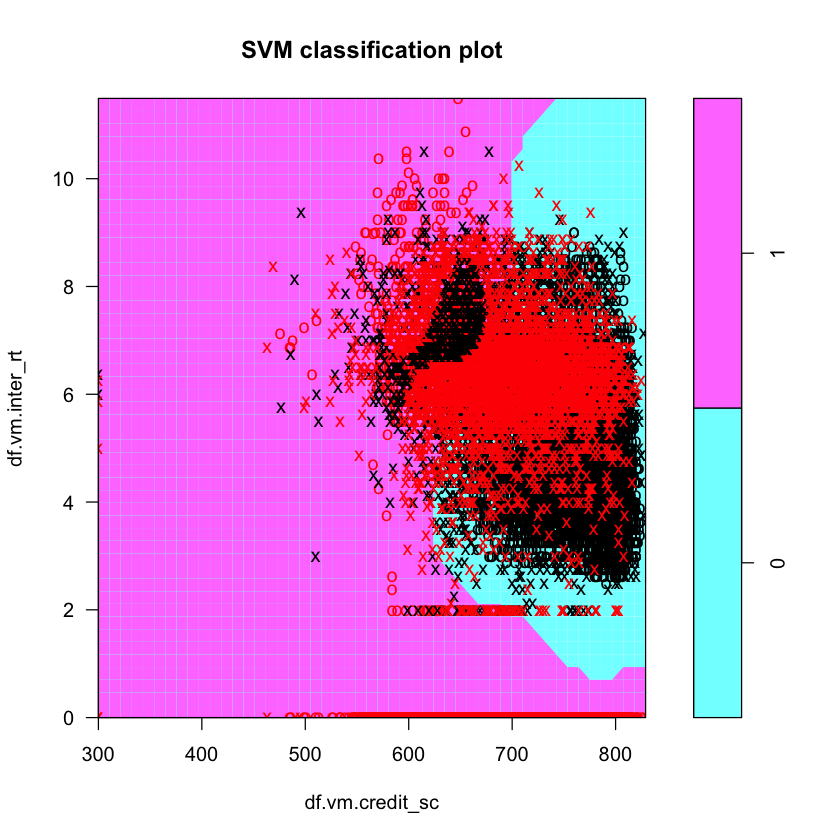

In [48]:
svmfit=svm(w~., data=dat[train,], kernel="radial")
plot(svmfit,dat[train,])

In [49]:
summary(svmfit)


Call:
svm(formula = w ~ ., data = dat[train, ], kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  10211

 ( 5101 5110 )


Number of Classes:  2 

Levels: 
 0 1




### Results

In [50]:
summary(svmfit)
table(true=dat[-train,"w"], pred=predict(svmfit, newdata=dat[-train,]))


Call:
svm(formula = w ~ ., data = dat[train, ], kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  10211

 ( 5101 5110 )


Number of Classes:  2 

Levels: 
 0 1




    pred
true     0     1
   0 10134  2129
   1  2738  9510

### Results

In [51]:
(2738+2129)/(2738+2129+10134+9510)
1-(2738+2129)/(2738+2129+10134+9510)

[1] 0.1985639

[1] 0.8014361

### Fit the traing data using Radial Support Vector Machine Model with gamma =2

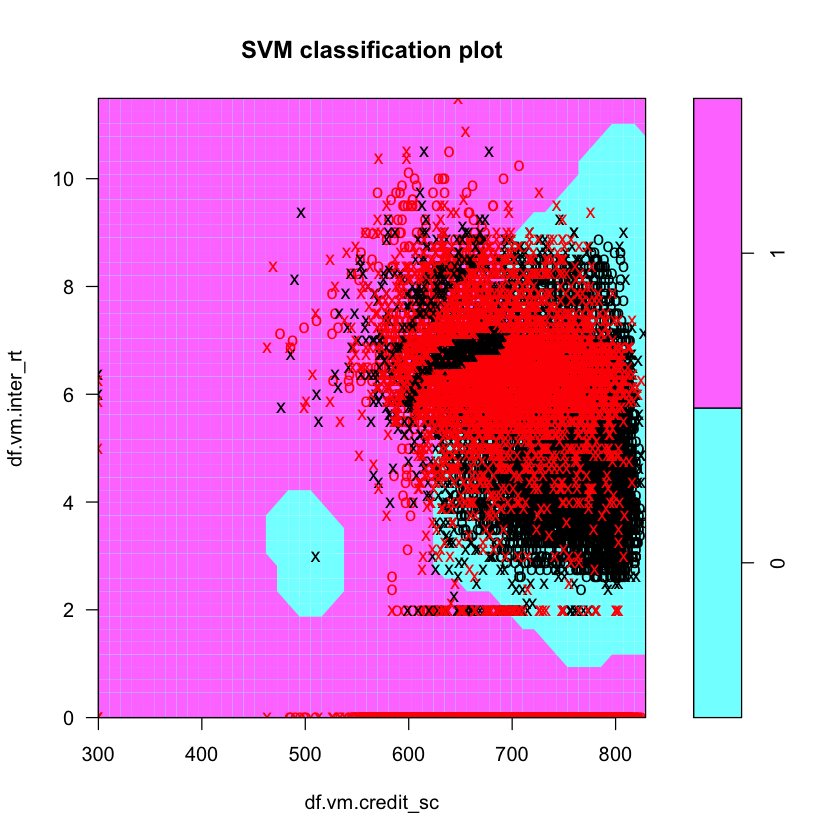

In [53]:
svmfit=svm(w~., data=dat[train,], kernel="radial", gamma=2)
plot(svmfit,dat[train,])

In [54]:
table(true=dat[-train,"w"], pred=predict(svmfit, newdata=dat[-train,]))

    pred
true    0    1
   0 9973 2290
   1 2563 9685

Would most likely overfit, therefore will stay with gamma =1.

In [55]:
(2290+2563)/(2290+2563+9973+9685)
1-(2290+2563)/(2290+2563+9973+9685)

[1] 0.1979927

[1] 0.8020073

### Fit the traing data using Radial Support Vector Machine Model with gamma =4

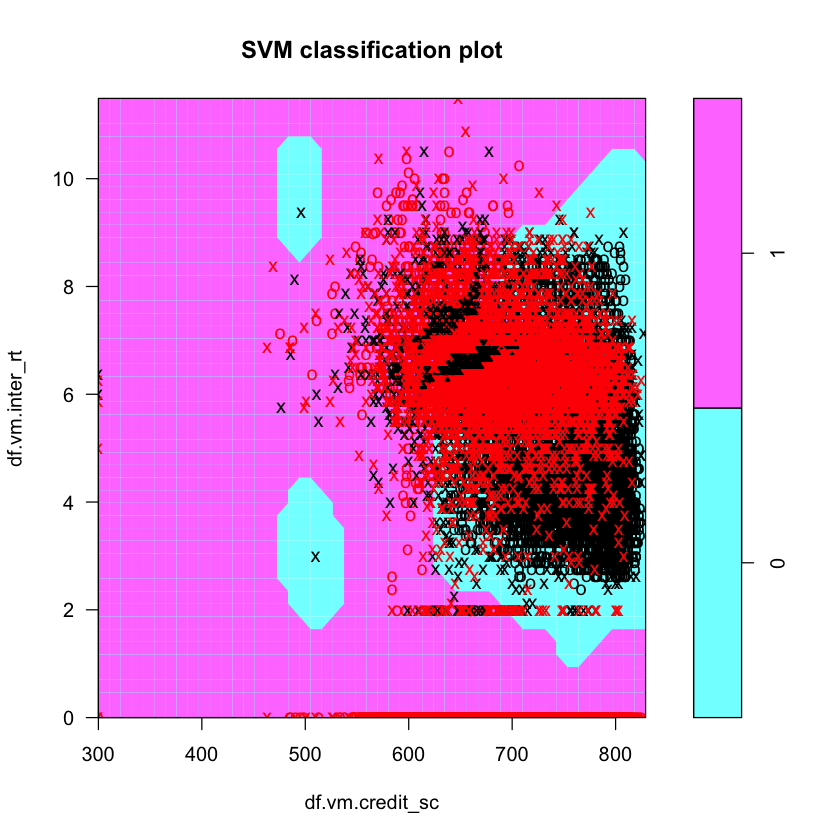

In [56]:
svmfit=svm(w~., data=dat[train,], kernel="radial", gamma=4)
plot(svmfit,dat[train,])

In [57]:
table(true=dat[-train,"w"], pred=predict(svmfit, newdata=dat[-train,]))

    pred
true    0    1
   0 9931 2332
   1 2536 9712

### Results

In [58]:
(2332+2536)/(2332+2536+9931+9712)
1-(2332+2536)/(2332+2536+9931+9712)

[1] 0.1986047

[1] 0.8013953

### Fit the traing data using Linear Support Vector Machine Model


Call:
svm(formula = w ~ ., data = dat[train, ], kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  14062

 ( 7030 7032 )


Number of Classes:  2 

Levels: 
 0 1




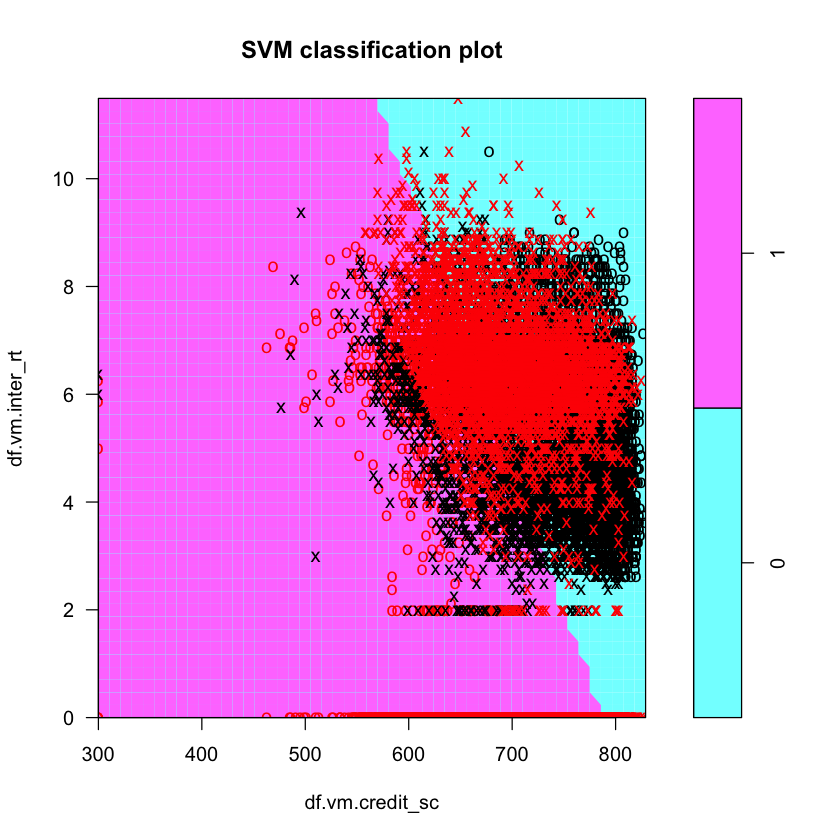

In [60]:
svmfit2=svm(w~., data=dat[train,], kernel="linear")
plot(svmfit2,dat[train,])
summary(svmfit2)

In [61]:
table(true=dat[-train,"w"], pred=predict(svmfit2, newdata=dat[-train,]))

    pred
true    0    1
   0 9889 2374
   1 3688 8560

### Results

In [62]:
(2374+3688)/(2374+3688+9889+8560)
1-(2374+3688)/(2374+3688+9889+8560)

[1] 0.2473175

[1] 0.7526825